In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

Basics

<AxesSubplot:>

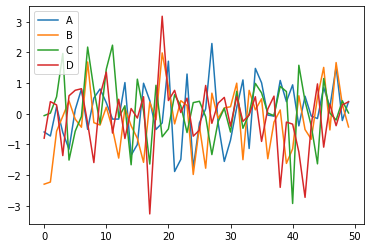

In [3]:
arr_1 = np.random.randn(50,4)
df_1 = pd.DataFrame(arr_1, columns = ['A', 'B', 'C', 'D'])
df_1.head()
df_1.plot() #Old way of doing it

In [5]:
df_1.iplot() #New and improved way of doing it

Line Plots

In [7]:
import plotly.graph_objects as go
df_stocks = px.data.stocks()
px.line(df_stocks, x = 'date', y = 'GOOG', labels = {'x':'Date', 'y':'Price'})

In [24]:
df_stocks = px.data.stocks()
px.line(df_stocks, x = 'date', y = ['GOOG', 'AAPL'],
        labels = {'x':'Date', 'y': 'Price'}, title = 'Apple vs. Google')

fig = go.Figure() #complex types of graphs

#Pulling individual columns of data from the data set and using markers 
fig.add_trace(go.Scatter(x=df_stocks.date, y = df_stocks.AAPL,
             mode = 'lines', name = 'Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y = df_stocks.AMZN,
             mode = 'lines+markers', name = 'Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y = df_stocks.GOOG,
             mode = 'lines+markers', name = 'Google',
                        line = dict(color='firebrick', width = 2,
                                   dash = 'dashdot')))

fig.update_layout(title = 'Stock Price Data 2018 - 2020', xaxis_title = 'Price', yaxis_title = 'Date')
fig.update_layout( 
xaxis = dict( 
showline = True, showgrid = False, showticklabels = True, 
linecolor= 'rgb(204, 204, 204)',
linewidth = 2, ticks = 'outside', tickfont = dict(
family = 'Arial', size = 12, color = 'rgb(82, 82, 82)',
),
),
yaxis = dict(showgrid = False, zeroline = False, showline = False,
            showticklabels = False),
autosize = False,
margin = dict(
autoexpand = False, l = 100, r = 20, t = 110, ),
showlegend = False, plot_bgcolor = 'white')

Bar chart

In [27]:
df_us = px.data.gapminder().query("country == 'United States'")
px.bar(df_us, x='year', y = 'pop')

In [29]:
#Stacked bar chart

df_tips = px.data.tips()
px.bar(df_tips, x = 'day', y = 'tip', color = 'sex', title = 'Tips by Sex on Each Day',
      labels = {'tip': 'Tip Amount', 'day': 'Day of the Week'})

In [34]:
#If you want your bars next to each other instead of stacked:
px.bar(df_tips, x = 'sex', y = 'total_bill', color = 'smoker', barmode = 'group')

In [44]:
#population data for countries in europe in 2007 greater than 2 million people
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df_europe, y = 'pop', x = 'country', text = 'pop', color = 'country', title = 'population data for countries in europe in 2007 greater than 2 million people')

##Putting population above the bar instead of inside
fig.update_traces(texttemplate= '%{text:.2s}', textposition = 'outside')
fig.update_layout(uniformtext_minsize = 8)
fig.update_layout(xaxis_tickangle = -45)


fig

Scatterplots

In [53]:
df_iris = px.data.iris()
px.scatter(df_iris, x = 'sepal_width', y= 'sepal_length', color = 'species', size = 'petal_length', 
          hover_data = ['petal_width'])
fig = go.Figure()
fig.add_trace(go.Scatter(
x = df_iris.sepal_width, y = df_iris.sepal_length,
mode = 'markers',
marker_color = df_iris.sepal_width,
text = df_iris.species, marker = dict(showscale=True)))
fig.update_traces(marker_line_width = 2, marker_size = 10)

fig = go.Figure(data = go.Scattergl(
x = np.random.rand(1000),
y = np.random.rand(1000),
mode = 'markers', 
marker = dict(
color = np.random.rand(1000),
colorscale = 'Viridis',
line_width = 1)))
fig

Pie Charts

In [65]:
df_asia = px.data.gapminder().query("year == 2007").query("continent == 'Asia'")
px.pie(df_asia, values = 'pop', names = 'country',
      title = 'Population of Asian Continent',
      color_discrete_sequence = px.colors.sequential.RdBu)

In [72]:
colors = ['blue', 'green', 'black', 'purple', 'red', 'brown']
fig= go.Figure(data=[go.Pie(labels=['Water', 'Grass', 'Normal', 'Psychic', 'Fire', 'Ground'],
                           values = [110, 90, 80, 80, 70, 60])])
fig.update_traces(hoverinfo = 'label+percent', textfont_size = 15, 
                 textinfo = 'label+percent',
                 pull = [0.1, 0, 0.2, 0, 0, 0],
                 marker = dict(colors = colors, line = dict(color = 'white',
                                                           width = 2)))

Histograms

In [81]:
dice_1 = np.random.randint(1,7,5000)
dice_2 = np.random.randint(1,7,5000)
dice_sum = dice_1 + dice_2
fig = px.histogram(dice_sum, nbins = 11, 
                   labels = {'value': 'Dice Roll'},
                  title = '5000 Dice Roll Histogram',
                  marginal = 'violin', 
                  color_discrete_sequence = ['purple'])
fig.update_layout(
xaxis_title_text = 'Dice Roll',
yaxis_title_text = 'Dice Sum', 
showlegend = False)

In [83]:
df_tips = px.data.tips()
px.histogram(df_tips, x = 'total_bill', color = 'sex')

Box Plots

In [87]:
px.box(df_tips, x = 'sex', y = 'tip', points = 'all')
px.box(df_tips, x = 'day', y = 'tip', color = 'sex')

fig = go.Figure()
fig.add_trace(go.Box(x = df_tips.sex, y = df_tips.tip, marker_color = 'blue',
                    boxmean = 'sd'))

In [92]:
df_stocks = px.data.stocks()
fig = go.Figure()
fig.add_trace(go.Box(y = df_stocks.GOOG, boxpoints = 'all',
                    fillcolor = 'blue', jitter = 0.5,
                    whiskerwidth = 0.2))
fig.add_trace(go.Box(y = df_stocks.AAPL, boxpoints = 'all',
                    fillcolor = 'red', jitter = 0.5,
                    whiskerwidth = 0.2))

fig.update_layout(title = 'Google vs. Apple', 
                 yaxis = dict (gridcolor = 'rgb(255, 255, 255)',
                              gridwidth = 3),
                 paper_bgcolor = 'rgb(243, 243, 243)',
                 plot_bgcolor = 'rgb(243, 243, 243)')

Violin Plots

In [104]:
df_tips = px.data.tips()
px.violin(df_tips, y = 'total_bill', box = True, points = 'all')

px.violin(df_tips, y = 'tip', x = 'smoker', color = 'sex', box = True,
         points = 'all', hover_data = df_tips.columns)

##Let's morph the left and right sides based on a boolean, whether or not the customer smoked

fig = go.Figure()
fig.add_trace(go.Violin(x = df_tips['day'][df_tips['smoker'] == 'Yes'],
                       y = df_tips['total_bill'][df_tips['smoker'] == 'Yes'],
                       legendgroup = 'Yes', scalegroup = 'Yes', name = 'Yes',
                       side = 'negative', line_color = 'blue'))

fig.add_trace(go.Violin(x = df_tips['day'][df_tips['smoker'] == 'No'],
                       y = df_tips['total_bill'][df_tips['smoker'] == 'No'],
                       legendgroup = 'Yes', scalegroup = 'Yes', name = 'No',
                       side = 'positive', line_color = 'red'))

3D Scatter Plots

In [108]:
flights = sns.load_dataset("flights")
fig = px.scatter_3d(flights, x = 'year', y = 'month', z = 'passengers', 
                   color = 'year', opacity = 0.7)
fig

In [110]:
fig = px.line_3d(flights, x = 'year', y = 'month', z = 'passengers', 
                   color = 'year')
fig

Scatter Matrix

In [112]:
fig = px.scatter_matrix(flights, color = 'month')
fig

Map Scatter Plots

In [115]:
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, locations = 'iso_alpha',
                    color='continent', 
                    hover_name = 'country',
                    size = 'pop',
                    projection = 'orthographic')
fig